In [9]:
# Linda Cobb
# https://www.kaggle.com/wrinkledtime

# just taking a quick look while I'm digging through papers

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import json
from glob import glob
from pathlib import Path
import os
import random

In [12]:
# file stuff
data_path = '../../data/arc-prize-2024/'

# load json files
def load_json(fpath):
    with open(fpath) as f:
        data = json.load(f)
    return data


# list files
def list_files(dir_name):
    for dirname, _, filenames in os.walk(dir_name):
        for filename in filenames:
            print(filename)

            

list_files(data_path)

f_train = load_json(data_path + 'arc-agi_training_challenges.json')
f_train_solution = load_json(data_path + 'arc-agi_training_solutions.json')

f_eval = load_json(data_path + 'arc-agi_evaluation_challenges.json')
f_eval_solution = load_json(data_path + 'arc-agi_evaluation_solutions.json')

f_submission = load_json(data_path + 'arc-agi_test_challenges.json')
f_sample_submission = load_json(data_path + 'sample_submission.json')


arc-agi_evaluation_solutions.json
arc-agi_test_challenges.json
arc-agi_training_solutions.json
sample_submission.json
arc-agi_training_challenges.json
arc-agi_evaluation_challenges.json


In [13]:
# check files okay, get number of examples in each
n_train = len(f_train)
n_submission = len(f_submission)
n_eval = len(f_eval)
print('train %d, eval %d, submission %d ' % (n_train, n_eval, n_submission))


# id numbers for each task
train_ids = list(f_train)


train 400, eval 400, submission 100 


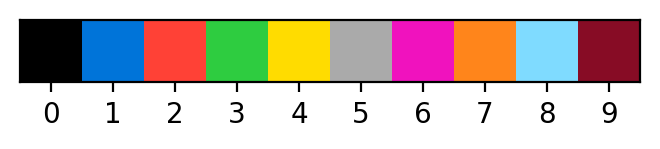

In [14]:
# notebook source: https://www.kaggle.com/code/allegich/arc-2024-starter-notebook-eda

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

# draw color map

# plot
# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

_cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(4, 1), dpi=200)
plt.imshow([list(range(10))], cmap=_cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

n samples 5
train id 007bbfb7, n_colors 1, shape in (3, 3) shape out (9, 9)


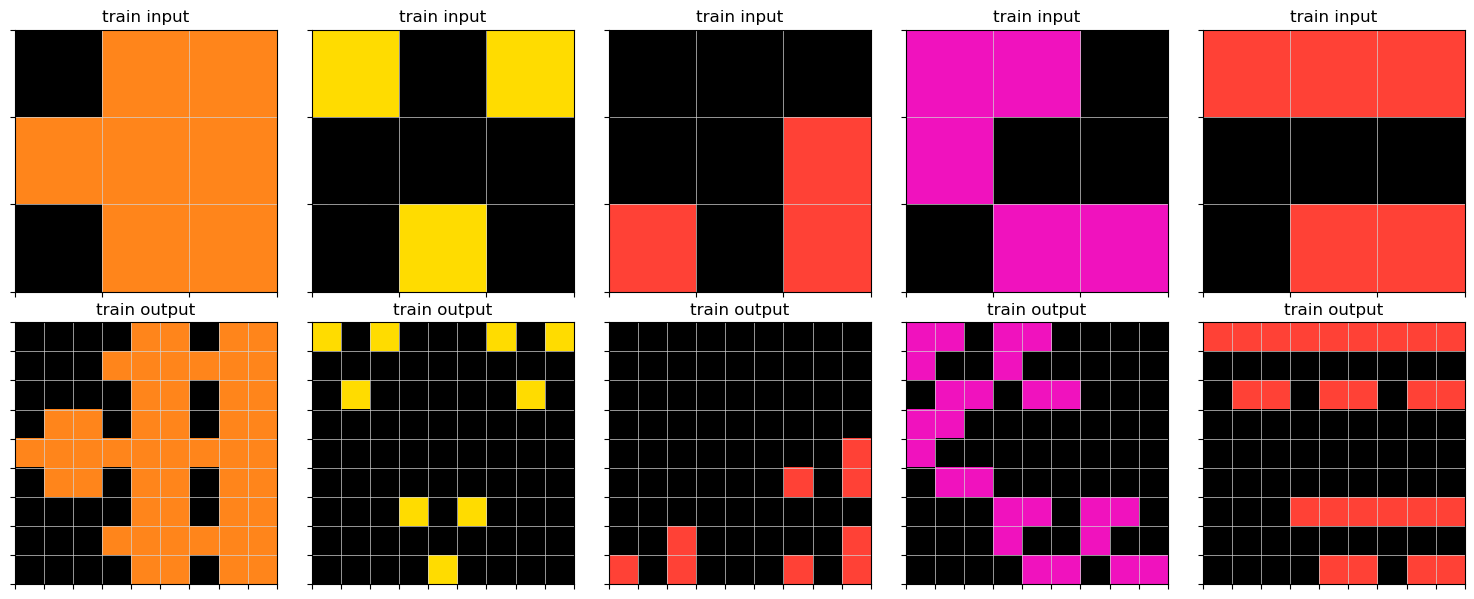

test img colors [0 7], shape (3, 3)


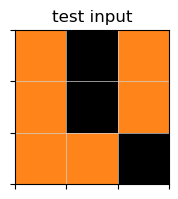

In [15]:
# adapted from: https://www.kaggle.com/code/allegich/arc-2024-starter-notebook-eda

def plot_one(task, ax, i,train_or_test, input_or_output):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)

    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(train_or_test + ' '+input_or_output)
    
    

def plot_sample(sample):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    n_samples = len(sample['train'])
    print('n samples', n_samples)
    print('train id %s, n_colors %s, shape in %s shape out %s'  
              %(train_ids[0], len(np.unique(sample['train'][0]['input']))-1,
               np.array(sample['train'][0]['input']).shape,
               np.array(sample['train'][0]['output']).shape))
    
    fig, axs = plt.subplots(2, n_samples, figsize=(3*n_samples,3*2))
    for i in range(n_samples):  
        plot_one(sample, axs[0,i],i,'train','input')
        plot_one(sample, axs[1,i],i,'train','output')        
    plt.tight_layout()
    plt.show()
    
    print('test img colors %s, shape %s'% (np.unique(sample['test'][0]['input']),
        np.array(sample['test'][0]['input']).shape))
    fig, axs = plt.subplots(1, 1, figsize=(2,2))
    plot_one(sample, axs, 0, 'test', 'input')
    plt.show()
    

plot_sample(f_train[train_ids[0]])

sample id: 13
n samples 3
train id 007bbfb7, n_colors 2, shape in (21, 21) shape out (10, 10)


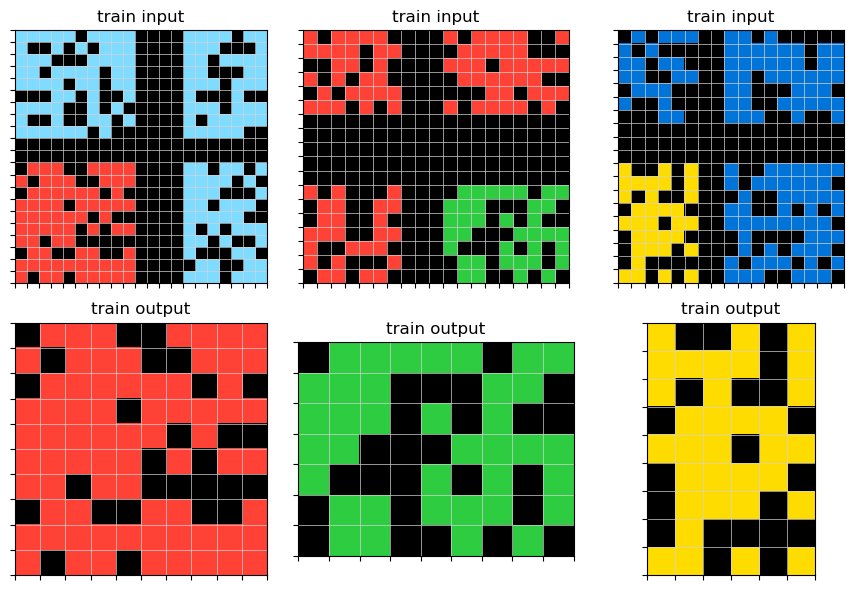

test img colors [0 1 3], shape (15, 17)


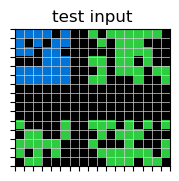

sample id: 373
n samples 4
train id 007bbfb7, n_colors 1, shape in (10, 10) shape out (10, 10)


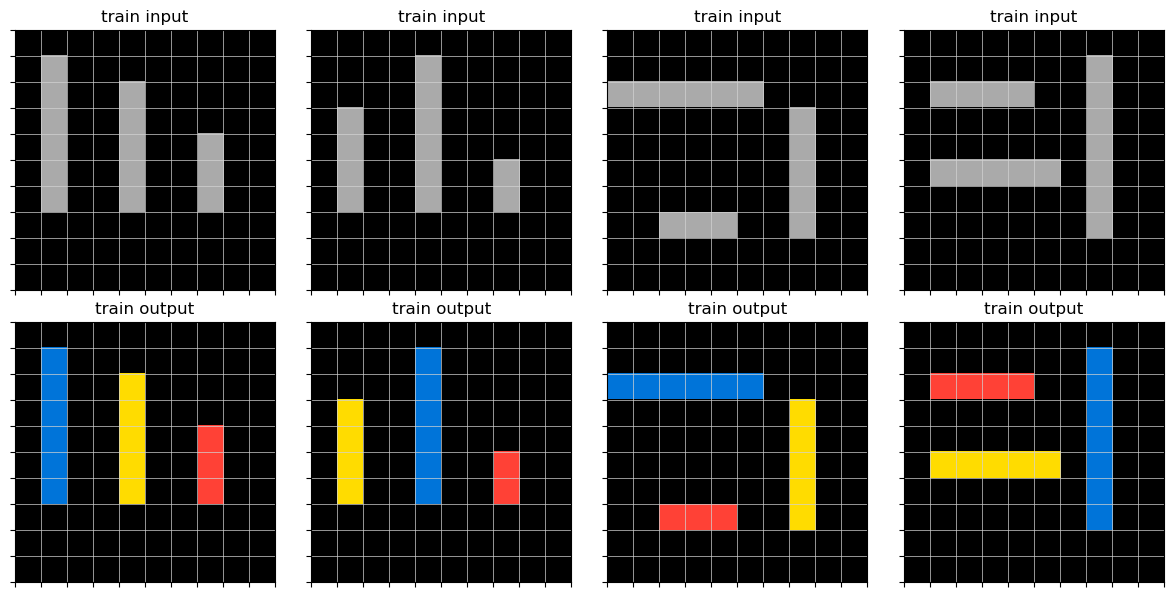

test img colors [0 5], shape (10, 10)


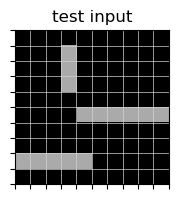

sample id: 46
n samples 2
train id 007bbfb7, n_colors 2, shape in (9, 9) shape out (9, 9)


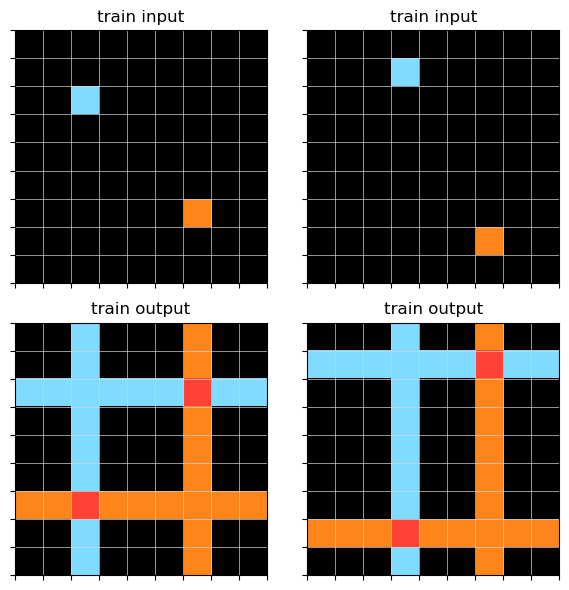

test img colors [0 7 8], shape (9, 9)


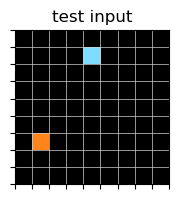

sample id: 381
n samples 3
train id 007bbfb7, n_colors 2, shape in (17, 12) shape out (17, 12)


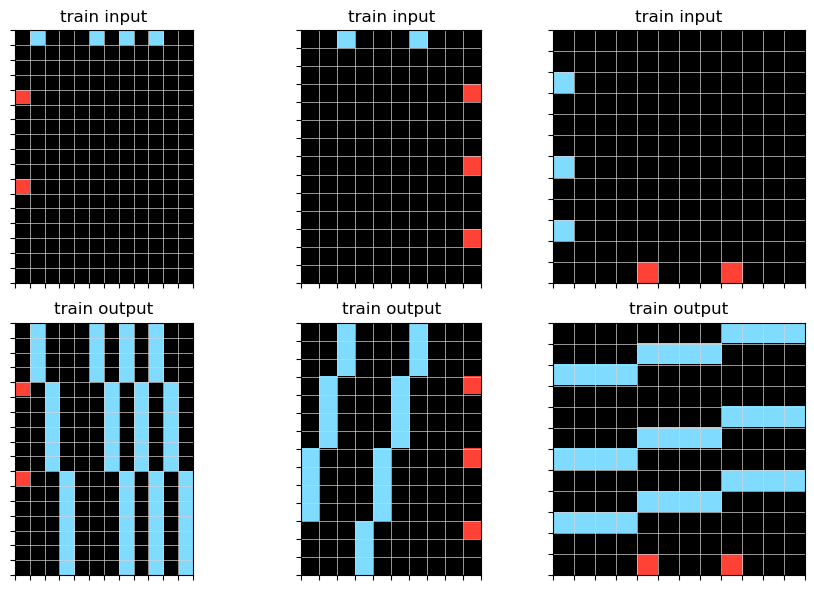

test img colors [0 2 8], shape (12, 17)


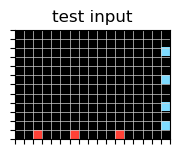

sample id: 189
n samples 3
train id 007bbfb7, n_colors 1, shape in (10, 10) shape out (10, 10)


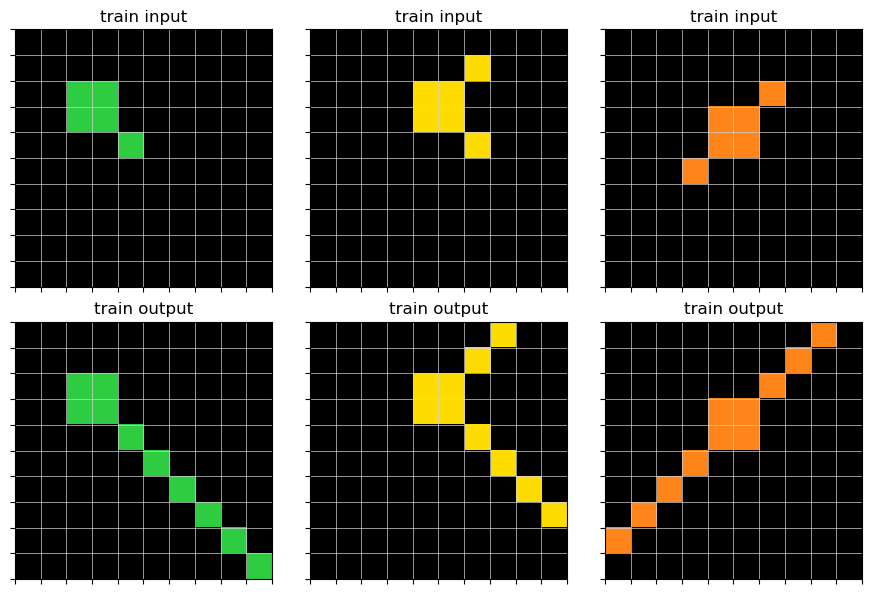

test img colors [0 8], shape (10, 10)


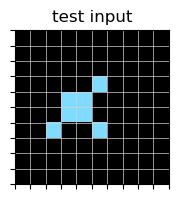

sample id: 344
n samples 2
train id 007bbfb7, n_colors 2, shape in (10, 10) shape out (10, 10)


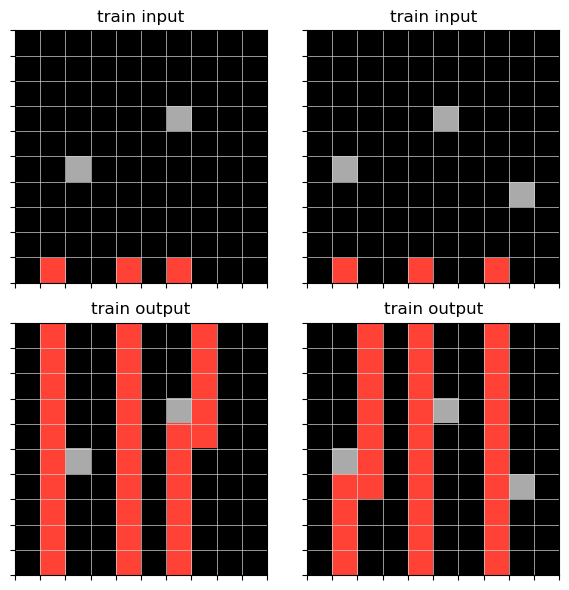

test img colors [0 2 5], shape (10, 10)


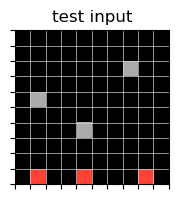

sample id: 239
n samples 3
train id 007bbfb7, n_colors 3, shape in (19, 19) shape out (19, 19)


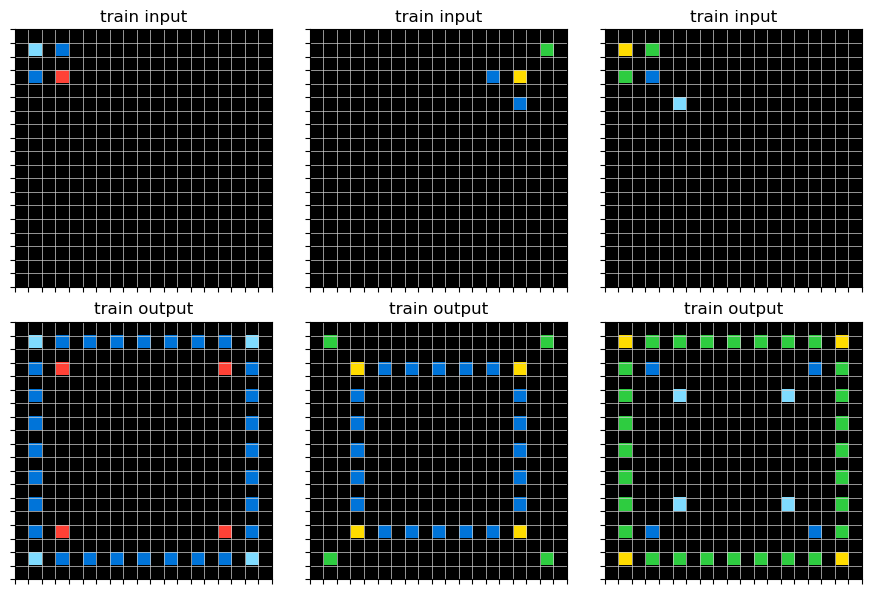

test img colors [0 1 2 3 4 8], shape (19, 19)


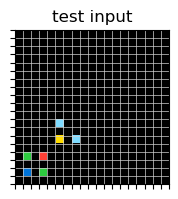

sample id: 70
n samples 2
train id 007bbfb7, n_colors 2, shape in (16, 16) shape out (16, 16)


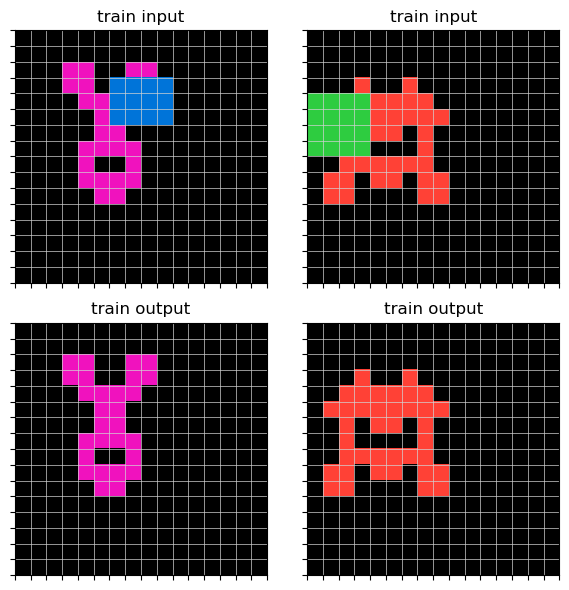

test img colors [0 5 8], shape (16, 16)


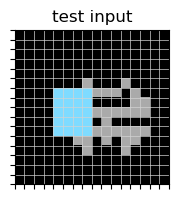

sample id: 162
n samples 4
train id 007bbfb7, n_colors 9, shape in (11, 11) shape out (11, 11)


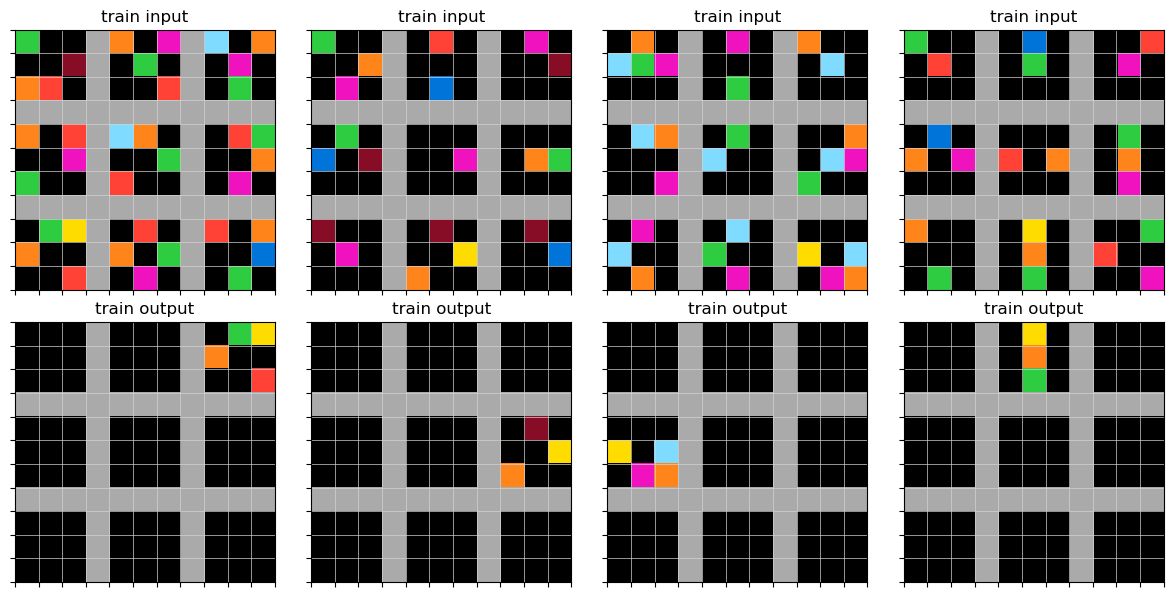

test img colors [0 2 3 4 5 6 7], shape (11, 11)


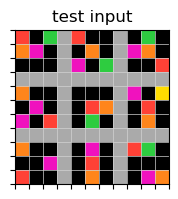

sample id: 281
n samples 2
train id 007bbfb7, n_colors 1, shape in (9, 9) shape out (9, 9)


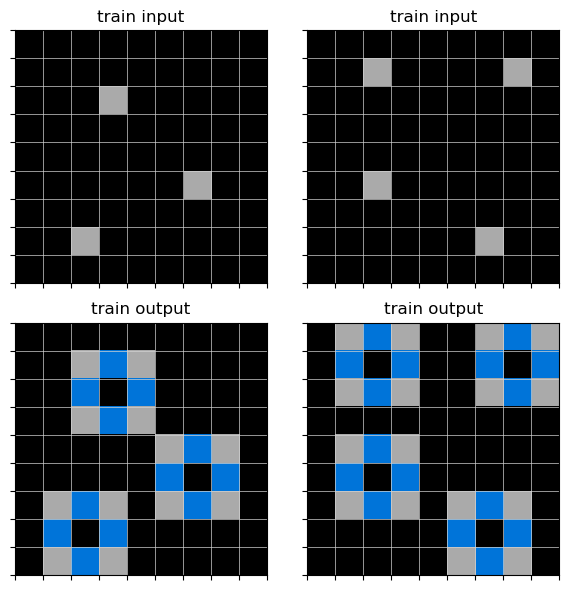

test img colors [0 5], shape (9, 9)


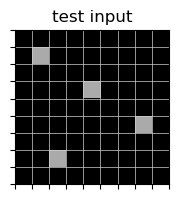

In [16]:
# print all 400
#for i in range(n_train):

# or print random selection
for i in range(10):
    z = random.randint(1,n_train)
    print('sample id:', z)
    id = train_ids[z]
    plot_sample(f_train[id])
   

In [17]:
# get some basic info on training samples
# colors per sample, shape in and out
# note: test input shape is often different than train input shape
def sample_info(sample):
    
    n_samples = len(sample['train'])
    print('input samples: id %s, n samples %d' % (train_ids[0], n_samples))
    for i in range(n_samples):
        print('colors %s, shape in %s shape out %s'  
              %(np.unique(sample['train'][i]['input']),
               np.array(sample['train'][0]['input']).shape,
               np.array(sample['train'][0]['output']).shape))
    
   
    print('test input:')
    print('colors %s, shape in %s'% (np.unique(sample['test'][0]['input']),
        np.array(sample['test'][0]['input']).shape))
   

#sample_info(f_train[train_ids[0]])

In [18]:
# print all
for i in range(5):
    print('\n****    sample number %d ****' % i)
    id = train_ids[i]
    sample_info(f_train[id])
   


****    sample number 0 ****
input samples: id 007bbfb7, n samples 5
colors [0 7], shape in (3, 3) shape out (9, 9)
colors [0 4], shape in (3, 3) shape out (9, 9)
colors [0 2], shape in (3, 3) shape out (9, 9)
colors [0 6], shape in (3, 3) shape out (9, 9)
colors [0 2], shape in (3, 3) shape out (9, 9)
test input:
colors [0 7], shape in (3, 3)

****    sample number 1 ****
input samples: id 007bbfb7, n samples 5
colors [0 3], shape in (6, 6) shape out (6, 6)
colors [0 3], shape in (6, 6) shape out (6, 6)
colors [0 3], shape in (6, 6) shape out (6, 6)
colors [0 3], shape in (6, 6) shape out (6, 6)
colors [0 3], shape in (6, 6) shape out (6, 6)
test input:
colors [0 3], shape in (20, 20)

****    sample number 2 ****
input samples: id 007bbfb7, n samples 3
colors [0 1], shape in (6, 3) shape out (9, 3)
colors [0 1], shape in (6, 3) shape out (9, 3)
colors [0 1], shape in (6, 3) shape out (9, 3)
test input:
colors [0 1], shape in (6, 3)

****    sample number 3 ****
input samples: id 007